#**About Customer Spending Score Dataset**
**Variables** - There are 14 attributes in each case of the dataset. They are:
* Gender - Gender of customer either Male or Female.
* Age - Age of customer in completed years.
* Annual Income - Yearly income of customer in K$.
* Spending Score - Score of customer between 1 to 100.
###This data set is created only for the learning purpose of the customer segmentation concepts. I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Customer%20Spending%20Score.csv")
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15000,39
1,Male,21,15000,81
2,Female,20,16000,6
3,Female,23,16000,77
4,Female,31,17000,40


In [4]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(dtype=np.int64)
df[["Gender"]]=oe.fit_transform(df[["Gender"]])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15000,39
1,1,21,15000,81
2,0,20,16000,6
3,0,23,16000,77
4,0,31,17000,40
...,...,...,...,...
195,0,35,120000,79
196,0,45,126000,28
197,1,32,126000,74
198,1,32,137000,18


In [5]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [6]:
x=df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

##**Scaling of variables**

In [7]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_ss=ss.fit_transform(x)
new_df=pd.DataFrame(x_ss,columns=x.columns)

##**KMeans Clustering algorithm**

In [8]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
cluster_labels=km.fit_predict(new_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


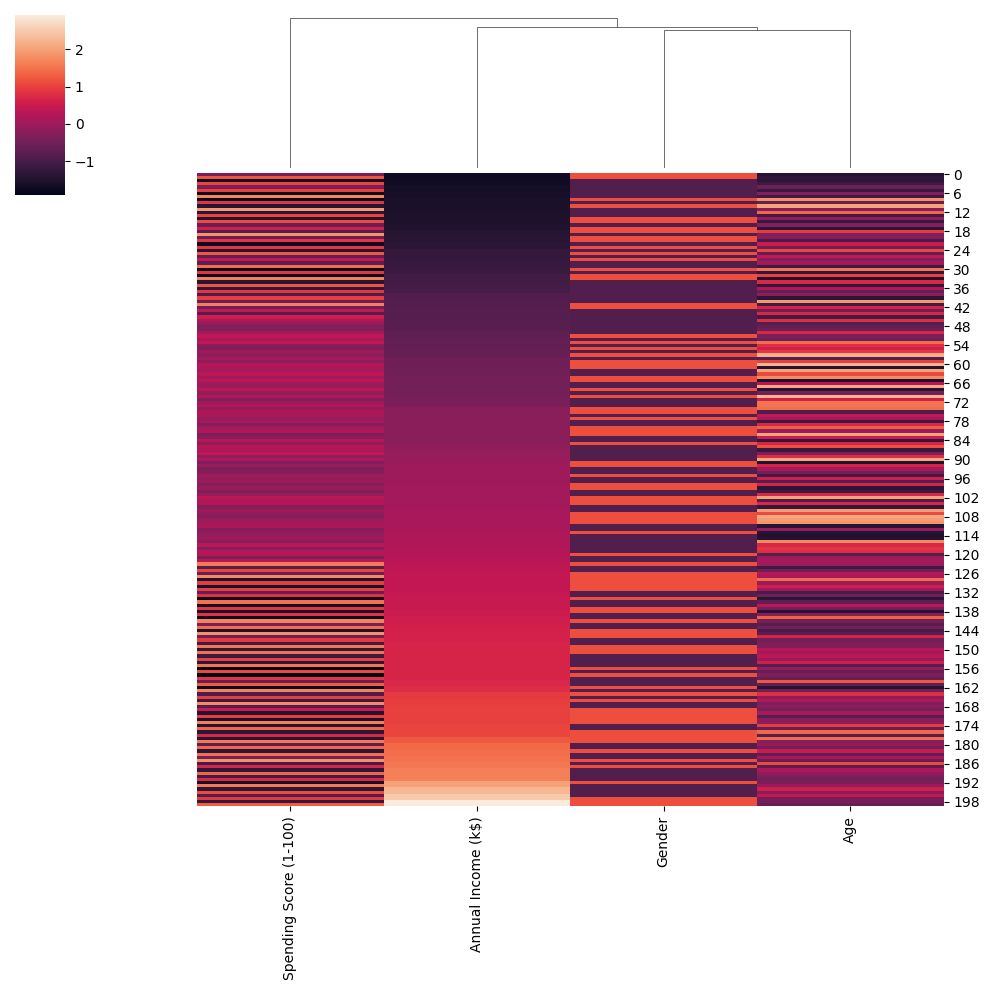

In [9]:
sns.clustermap(new_df,row_cluster=False)

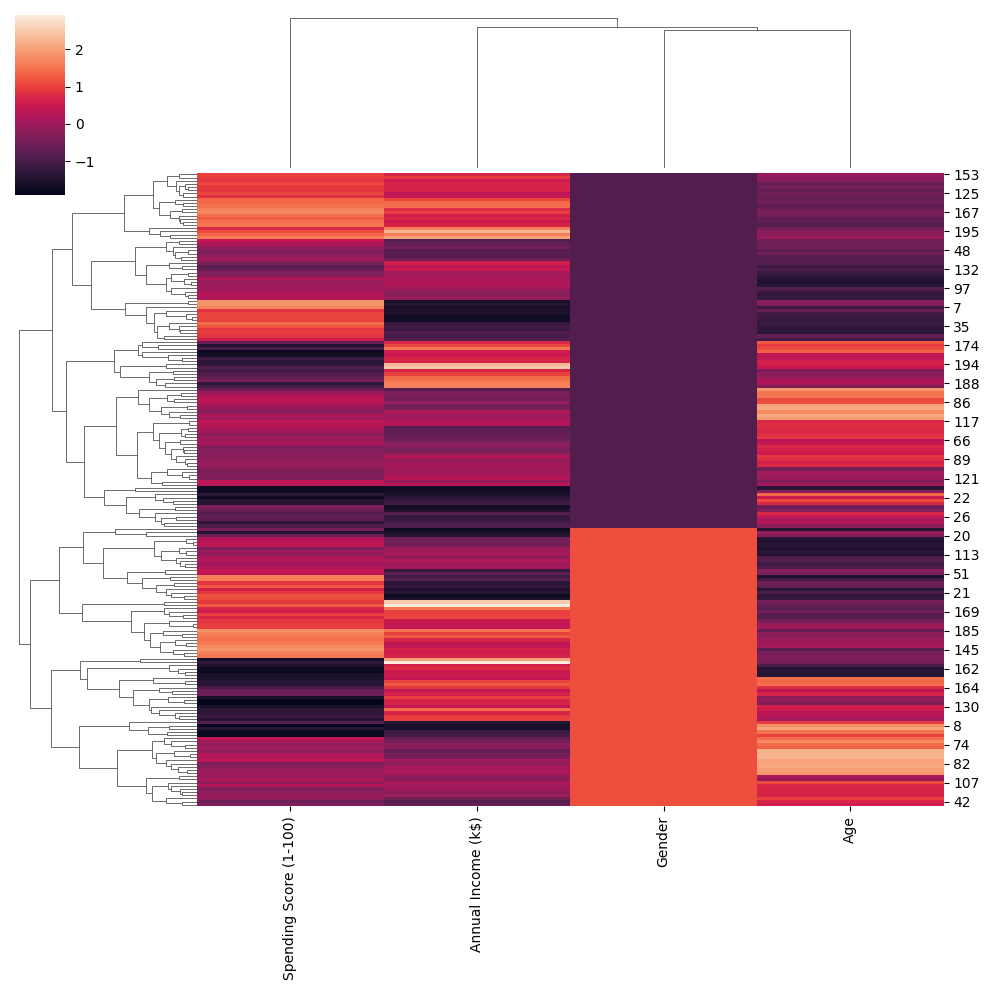

In [10]:
sns.clustermap(new_df,row_cluster=True)

##**Elbow method for finding optimal value of 'k'**

In [13]:
wcss=[]
for i in range(1,20):
  km=KMeans(n_clusters=i)
  km.fit(new_df)
  wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Text(0, 0.5, 'WCSS')

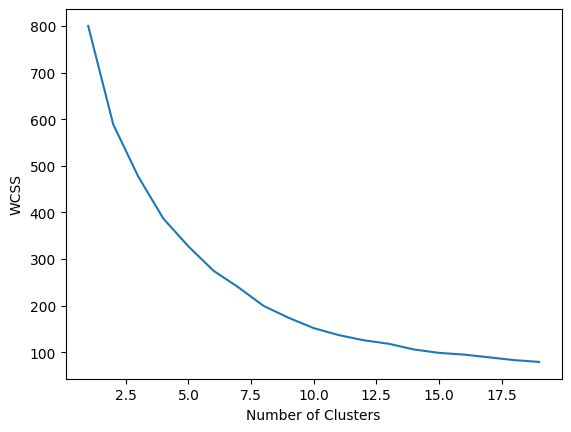

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1,20),wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

##**Conclusion** - Elbow method gives 10 as the optimal value for 'k'##